In [62]:
import pandas as pd
import numpy as np
import time
import numba

In [63]:
Data = pd.read_csv('day_approach_maskedID_timeseries.csv')
# Get the min, max, and number of unique values
min_value = Data['Athlete ID'].min()
max_value = Data['Athlete ID'].max()
num_unique_values = Data['Athlete ID'].nunique()
# Print the results
print(f"Athlete IDs in full Data set: Min: {min_value}, Max: {max_value}, Number of unique values: {num_unique_values}")


Athlete IDs in full Data set: Min: 0, Max: 73, Number of unique values: 74


In [64]:
# All athlete IDs
all_ids = Data['Athlete ID'].unique()

# Randomly select 64 IDs for the training set
train_ids = np.random.choice(all_ids, 74, replace=False)

# Get the remaining IDs for the test set
test_ids = np.setdiff1d(all_ids, train_ids)

# Create the train and test sets
Train = Data[Data['Athlete ID'].isin(train_ids)]
Test = Data[Data['Athlete ID'].isin(test_ids)]

print(f"Training set IDs: \n{train_ids}, \nNumber of Train IDs: {len(train_ids)}\n")
print(f"Test set IDs: \n{test_ids}, \nNumber of Test IDs: {len(test_ids)}\n")
Train.info()

Training set IDs: 
[45 26 60 67 41 35 64 71 56 39 38 68 21 24 50 30 12 19 61  8 51 47 22  1
 28 17 15 62 16 18  5 58 32  6 25  3 33 44 48 13 14  7 59  0 63 73 20 55
 65 66 54  2 53 46 42 27 52 43 72 10 36  4 31 37 40 29 34 49  9 57 69 70
 23 11], 
Number of Train IDs: 74

Test set IDs: 
[], 
Number of Test IDs: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nr. sessions                 42766 non-null  float64
 1   total km                     42766 non-null  float64
 2   km Z3-4                      42766 non-null  float64
 3   km Z5-T1-T2                  42766 non-null  float64
 4   km sprinting                 42766 non-null  float64
 5   strength training            42766 non-null  float64
 6   hours alternative            42766 non-null  float64
 7   perceived exertion           42766 non-null  flo

In [65]:
Train.head(10)

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4
5,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,...,0.0,0.0,0.0,1.0,0.08,0.00,0.17,0,0,5
6,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,...,0.0,0.0,0.0,0.0,0.09,0.00,0.18,0,0,6
7,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,7
8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,1.2,0.0,0.0,0.11,0.00,0.18,0,0,8
9,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,9


In [66]:
Train.describe()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
count,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,...,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000
mean,0.829561,7.038187,0.691381,0.579930,0.073016,0.116237,0.163492,0.247788,0.349802,0.195898,...,0.580347,0.072595,0.116120,0.162308,0.247550,0.349503,0.196224,34.550858,0.013632,1228.039892
std,0.580696,7.473216,2.317657,1.811938,0.483480,0.326010,0.549664,0.257262,0.368300,0.190321,...,1.814538,0.483691,0.326016,0.554031,0.256718,0.368042,0.190568,19.050033,0.115960,807.021168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,20.000000,0.000000,436.000000
50%,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.160000,...,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.170000,34.000000,0.000000,1256.000000
75%,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,50.000000,0.000000,1913.000000
max,2.000000,55.900000,42.200000,48.000000,40.000000,2.000000,10.220000,1.000000,1.000000,1.000000,...,48.000000,40.000000,2.000000,20.000000,1.000000,1.000000,1.000000,73.000000,1.000000,2673.000000


In [67]:
# Clear invalid data: Exclude the data that has not experienced any sports training for 7 days
@numba.njit(parallel=True)
def judge_sum(a, b, c, d, e, f, g):
    return a + b + c + d + e + f + g

def DataClear(data):
    columns_original = data.columns
    data_original = data.values
    # The provided code checks the sum of certain columns. 
    # The line below will be updated to include data_original[:, 30] as the cut-off line.
    judge = judge_sum(data_original[:, 0], data_original[:, 10], data_original[:, 20], data_original[:, 30], data_original[:, 40], data_original[:, 50], data_original[:, 60])

    index = np.where(judge != 0)
    data_new = data_original[index]
    return pd.DataFrame(data_new, columns=columns_original)


In [68]:
start = time.time()
Train_Clear = DataClear(Train)
end = time.time()
print("Train samples", Train_Clear.shape[0], "Time taken ", end - start)

Train samples 40484 Time taken  0.13384604454040527


In [69]:
import numpy as np
import numba

def Padding(data):
    day_7 = data[0:10]
    day_6 = data[10:20]
    day_5 = data[20:30]
    day_4 = data[30:40]
    day_3 = data[40:50]
    day_2 = data[50:60]
    day_1 = data[60:70]
    day_8 = np.zeros(10, dtype=float)  # padding
    data_reshape = np.vstack((day_1, day_2, day_3, day_4, day_5, day_6, day_7, day_8))
    
    return data_reshape

@numba.njit()
def TransformInt(data):
    return int(data)

def List_to_arr(data_list, data):
    new_data = []
    data_information = []

    for i in range(len(data_list)):
        temp_feature = data_list[i]
        temp_information = data[i]
        if np.sum(temp_feature[:, 0]) != 0:
            new_data.append(temp_feature)
            data_information.append(temp_information)

    new_data = np.array(new_data)
    data_information = np.array(data_information)
    ID = data_information[:, 0]
    Label = np.array(list(map(TransformInt, data_information[:, 1])))
    Date = data_information[:, 2]

    return new_data, ID, Label, Date

In [70]:
start = time.time()

Train_reshape = list(map(Padding, Train_Clear.values))
Train_Feature, Train_ID, Train_Label, Train_Date = List_to_arr(Train_reshape, Train_Clear.values)

print("Train samples", Train_Feature[0][0])

end = time.time()

print("time:", end-start,
      f"\n Original TrainSet: {np.array(Train_reshape).shape}",
      "Train_Feature: ", Train_Feature[0][0].shape,
      )

Train samples [1.   0.   0.   0.   0.   0.   1.   0.1  0.   0.15]
time: 0.2405719757080078 
 Original TrainSet: (40484, 8, 10) Train_Feature:  (10,)


[ 0.  16.4  0.   0.   0.   0.   5.8  0. ]


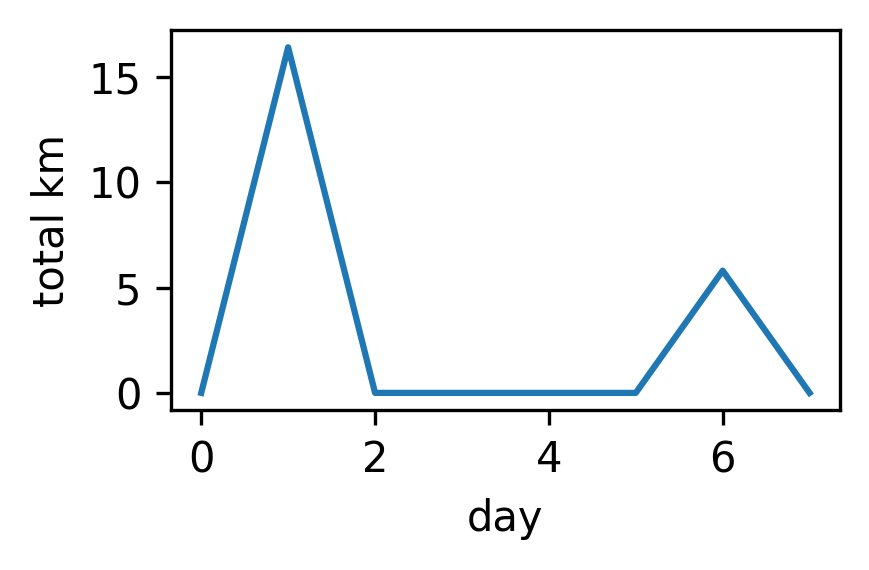

In [77]:
n_sample = 0

# The original time series

import matplotlib.pyplot as plt

X_new = Train_Feature[n_sample, :, 1]  # With "total km" for example
X_sample = [list(range(0, 8, 1)), X_new]
print(X_new)

fig = plt.figure(figsize=(3, 2), dpi=300, edgecolor='black')
plt.plot(X_sample[0], X_sample[1])

plt.xlabel("day")
plt.ylabel("total km")
plt.tight_layout()
plt.show()

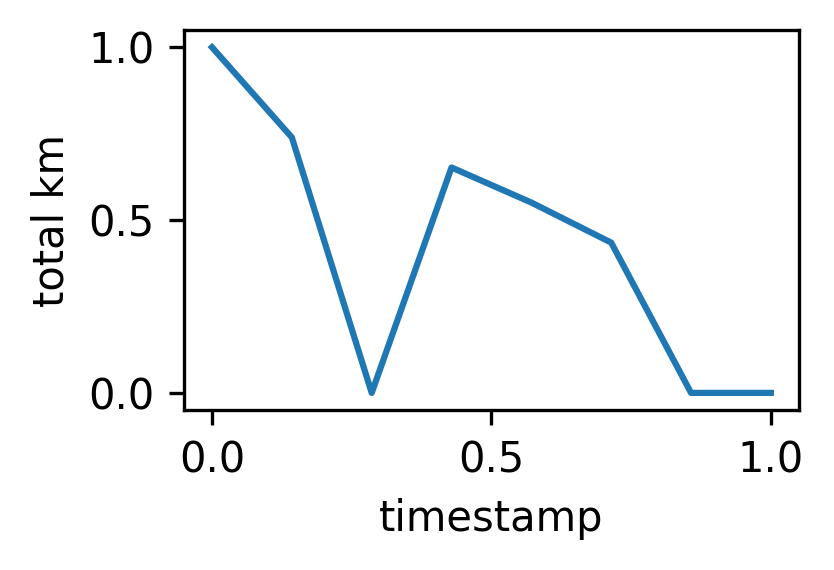

[1.         0.73913043 0.         0.65217391 0.55072464 0.43478261
 0.         0.        ]


In [72]:
from pyts.preprocessing import MinMaxScaler

# normalization
scaler = MinMaxScaler()
X_sample_scaler = scaler.transform(X_sample)

fig = plt.figure(figsize=(3, 2), dpi=300, edgecolor='black')
plt.plot(X_sample_scaler[0, :], X_sample_scaler[1, :])
plt.xlabel("timestamp")
plt.ylabel("total km")
plt.tight_layout()
plt.show()
print(X_sample_scaler[1])

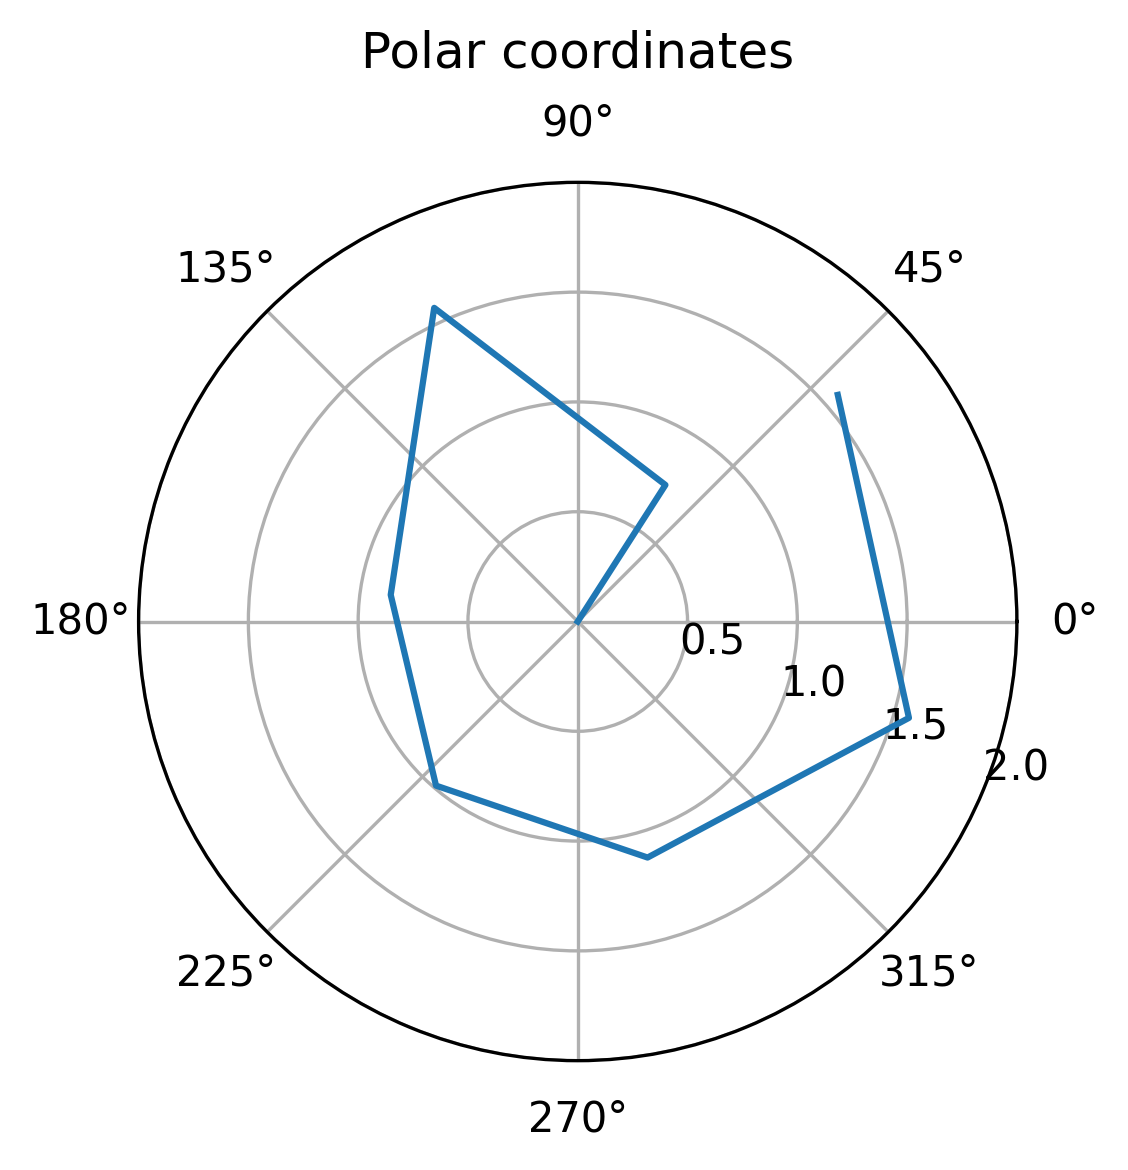

In [73]:
arccos_X = np.arccos(X_sample_scaler[1, :])
fig, ax = plt.subplots(figsize=(6, 4), dpi=300, subplot_kw={'projection': 'polar'})
ax.plot(X_sample[0], arccos_X)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_title("Polar coordinates", va='bottom')
plt.tight_layout()
plt.show()


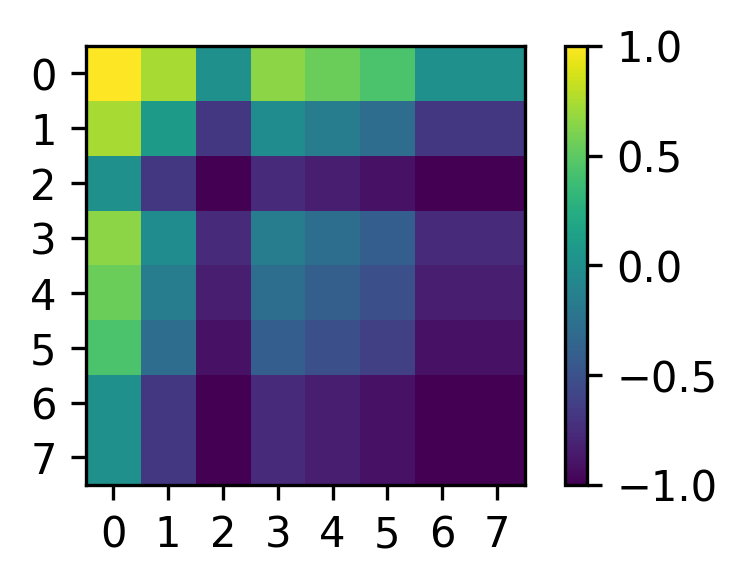

In [74]:
from matplotlib.pyplot import MultipleLocator

fig = plt.figure(figsize=(3, 2), dpi=300, edgecolor='black')
field = [a+b for a in arccos_X for b in arccos_X]
gram = np.cos(field).reshape(8, 8)
plt.imshow(pd.DataFrame(gram).rename(index={0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7, 7:8},
                                     columns={0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7, 7:8}))
ax = plt.gca()
major_locator = MultipleLocator(1)
ax.xaxis.set_major_locator(major_locator)
ax.yaxis.set_major_locator(major_locator)
plt.tight_layout()
plt.colorbar()

In [75]:
print(gram)

[[ 1.00000000e+00  7.39130435e-01  6.12323400e-17  6.52173913e-01
   5.50724638e-01  4.34782609e-01  6.12323400e-17  6.12323400e-17]
 [ 7.39130435e-01  9.26275992e-02 -6.73562321e-01 -2.85653842e-02
  -1.55156366e-01 -2.85205684e-01 -6.73562321e-01 -6.73562321e-01]
 [ 6.12323400e-17 -6.73562321e-01 -1.00000000e+00 -7.58069381e-01
  -8.34686991e-01 -9.00535442e-01 -1.00000000e+00 -1.00000000e+00]
 [ 6.52173913e-01 -2.85653842e-02 -7.58069381e-01 -1.49338374e-01
  -2.73582409e-01 -3.99114471e-01 -7.58069381e-01 -7.58069381e-01]
 [ 5.50724638e-01 -1.55156366e-01 -8.34686991e-01 -2.73582409e-01
  -3.93404747e-01 -5.12219724e-01 -8.34686991e-01 -8.34686991e-01]
 [ 4.34782609e-01 -2.85205684e-01 -9.00535442e-01 -3.99114471e-01
  -5.12219724e-01 -6.21928166e-01 -9.00535442e-01 -9.00535442e-01]
 [ 6.12323400e-17 -6.73562321e-01 -1.00000000e+00 -7.58069381e-01
  -8.34686991e-01 -9.00535442e-01 -1.00000000e+00 -1.00000000e+00]
 [ 6.12323400e-17 -6.73562321e-01 -1.00000000e+00 -7.58069381e-01
  -